# **Applied Statistics Assessment Notebook - Problems**

## Import Libraries
___

In [95]:
# Libraries

import math # mathmatical functions
import itertools # permutations and combinations
import random # random selections
import numpy as np # numerical structures and operations
import matplotlib.pyplot as plt # plotting
from tabulate import tabulate # table formatting
import scipy.stats as stats # Statistical models.
import statsmodels as sm # Statistics.

## **Problem 1: Extending the Lady Tasting Tea**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Nice_Cup_of_Tea.jpg/960px-Nice_Cup_of_Tea.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Vanderdecken - Author's original own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

---
### **Answering the Problem**
___

In order to answer this problem, there are three things we need to address:

1. The estimated probability of the original 8-cup experiment
2. The estimated probability of the new 12-cup experiment
3. How the two compare with one another

---
#### 1. Running the Original Experiment
---

Let's start off by re-running the original experiment and determining it's probability. First we need to flag the number of cups involved in the experiment.

In [96]:
# Total number of cups
no_cups  = 8

# Number of cups with tea-first
cups_tea = 4

# Number of cups with tea-first
cups_milk = 4


Next we need label the various types of cups, so that we can determine the overall number of ways four cups (at this stage any four cups) could be selected out of that total.

In [97]:
# Label the cups
labels = list(range(no_cups))

# Show the different ways of selecting cups_milk out of no_cups
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 70


Now we want to label four specic cups as the cups which had milk put in them first.

In [98]:
# Select four cups at random to put milk in and then sort those labels so that they mirror the iterated data in combs
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{4, 5, 6, 7}

With the milk cups labelled, we can now start to look at how often these cups will be selected at random. To do this, we look at every single combination of cup selections and identify which of those include cups labelled as milk first cups and how many milk first cups they include. 

In [99]:
# Create a list to store the overlap between each element of combs and labels_milk.
no_overlaps = []

# loop through combinations
for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    # Figure out where they overlap
    overlap = s1.intersection(s2)
    #Append overlap to no_overlaps
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs.
counts= np.unique(no_overlaps, return_counts=True)

We can now chart the results of the above analysis to see the breakdown of the the amount of milk first cups in each possible combination of cups (e.g. of the 70 possible cup combinations, how many of these combinations include 0,1,2,3 or 4 milk first cups?).

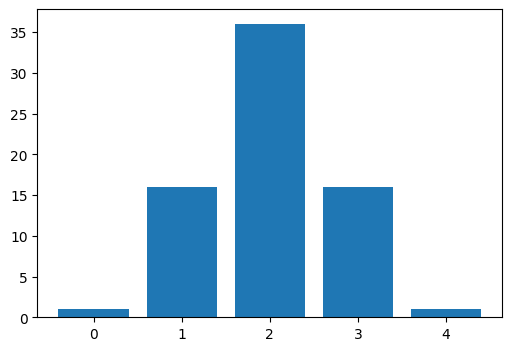

In [100]:
# Chart for the orginal experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [101]:
# Prepare data for tabulation
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers,tablefmt="grid")) 

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |           1 |
+-----------------+-------------+
|               1 |          16 |
+-----------------+-------------+
|               2 |          36 |
+-----------------+-------------+
|               3 |          16 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


Finally, lets work out the probability for how likely it is, given the number of combinations, that the participant will randomly select all the correct milk first cups and, also, how likely it is that they will select more than half milk first cups.

In [102]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 1.43%
The probability of the participant selecting two or more cups by chance is 75.71%


So, we can see that it is highly unlikely that the participant will select all four milk first cups correctly at random but there is a very good chance that they will select more than two correct cups, even if selecting at random.

---
### 2. Running the New 12-cup Experiment
---

So, for the next part we are going to re-run everything we have done above. However, this time we will be changing the total number of cups to 12 and the number of tea first cups to 8 (the number of milk first cups will remain the same).

In [103]:
no_cups  = 12
cups_tea = 8
cups_milk = 4

In [104]:
labels = list(range(no_cups))
combs = list(itertools.combinations(labels, cups_milk))
print("The maximum number of cup combinations is",len(combs))

The maximum number of cup combinations is 495


In [105]:
labels_milk = random.sample(labels, 4)
labels_milk.sort()
set(labels_milk)

{0, 8, 9, 11}

In [106]:
no_overlaps = []

for comb in combs:
    s1 = set(comb)
    s2 = set(labels_milk)
    overlap = s1.intersection(s2)
    no_overlaps.append(len(overlap))

counts= np.unique(no_overlaps, return_counts=True)

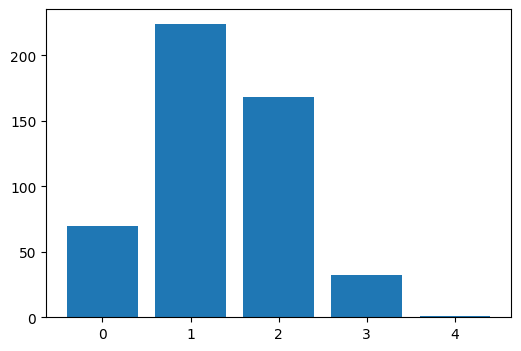

In [107]:
# Chart for the updated experiment
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(counts[0],counts[1]);

In [108]:
data = list(zip(*counts))
headers = ["Overlap Count", "Frequency"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------------+-------------+
|   Overlap Count |   Frequency |
+=================+=============+
|               0 |          70 |
+-----------------+-------------+
|               1 |         224 |
+-----------------+-------------+
|               2 |         168 |
+-----------------+-------------+
|               3 |          32 |
+-----------------+-------------+
|               4 |           1 |
+-----------------+-------------+


In [109]:
# Number of times where the participant selects all the correct cups_milk
overlap_4 = dict(data).get(4, 0)
overlap_3 = dict(data).get(3, 0)
overlap_2 = dict(data).get(2, 0)

# Calculate the likeilhood of this happening
likelihood = overlap_4 / len(combs)
likelihood50 = (overlap_4 + overlap_3 +overlap_2) / len(combs)

print(f"The probability of the participant correctly identifying all cups by chance is {likelihood*100:.2f}%")
print(f"The probability of the participant selecting two or more cups by chance is {likelihood50*100:.2f}%")

The probability of the participant correctly identifying all cups by chance is 0.20%
The probability of the participant selecting two or more cups by chance is 40.61%


So, having rerun the experiement with a greater number of overall cups but the same amount of milk first cups, we can see a notable drop in the probability of the particpant both identifying all the milk first cups by chance but also a substantive drop in the likelihood of the probability of the participant selecting two or more cups by chance.

---
### 3. Comparing the Two Experiments
---

The results from both experiments demonstrate a significant drop in the likelihood the participant will pick out a statistically significant number of cups correctly at random. This is especialy true both when it comes to identifying all the cups correctly (e.g 1.43% vs 0.20%) but it is also when it comes to selecting two or more milk first cups (e.g. 75.71% vs 40.61%). As the number of tea first cups increase while the number of milk first cups remain the same, it is increasingly difficult for the participant to pick out the relevant cucps at random.

This is a trend that we would expect to continue the more non-milk first cups we add to the total. Consequently, the more tea first cups added, the more statistically significant it will be if a participant manages to correctly identify all four milk first cups correctly. This has notable implications for the p-value. It represents the probability of obtaining results as extreme as, or more extreme than, the observed results under the assumption that the null hypothesis is true. Consequently, as the likelihood of success decreases dramatically, the argument for a relaxed p-value to reflect this change in circumstances increases. 

---
### **Problem 1 - Conclusion**
---

The p-value used for the 12-cup experiment should be relaxed compared to the one used for the 8-cup experiment.

## **Problem 2: Normal Distribution**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Planche_de_Galton.jpg/1280px-Planche_de_Galton.jpg" alt="Tea Set" style="width: 600px; height: 400px;">

<small>By Antoine Taveneaux - Author's original own work (Original text: self-made, Mathematica, Inkscape), Public Domain, https://commons.wikimedia.org/w/index.php?curid=1613904<small>

___
### **Description of the problem**
___
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

---
### **Answering the Problem**
___

The problem here is relatively straigh forward:
- First we need to establish the parameters and generate a random sample based off them. 
- Then we can compute the standard deviation with ddof = 1 and ddof = 2. 
- Plot the results of those two variances on the same histogram. 
- Analyise the results and infer what might happen to the results if the sample size is increased.

---
### 1. Generating 100,000 samples of size 10
---
First off we need to actually generate the data so that we can establish the standard deviation. The problem description establishes the parameters.

In [110]:
# Establish the parameters
samples = 100000 # Number of samples
samplesize = 10 # Size of sample

# Create a numpy array with random numbers from the sample data
data = np.random.normal(0,1, (samples,samplesize)) # mean (0), standard deviation (1)

---
### 2. Calculate the Standard Deviation
---
Now that the sample data has been properly prepared we can look at computing the standard deviation. We are calculating it on the basis of ddof = 0 (standard deviation for a population) and ddof = 1 (standard deviation for a sample).

In [111]:
sample_sd = np.std(data, ddof=1, axis=1) # ddof 1 (divide by (N)) - sample deviation
population_sd = np.std(data, ddof=0, axis=1) # ddof 0 (divide by (N-1)) - population - deviation

---
### 3. Plot the Histogram
---
Now that we have our two datasets, we can plot each of them in a histogram to see how deviation in ddof impacts the distribution of the results.

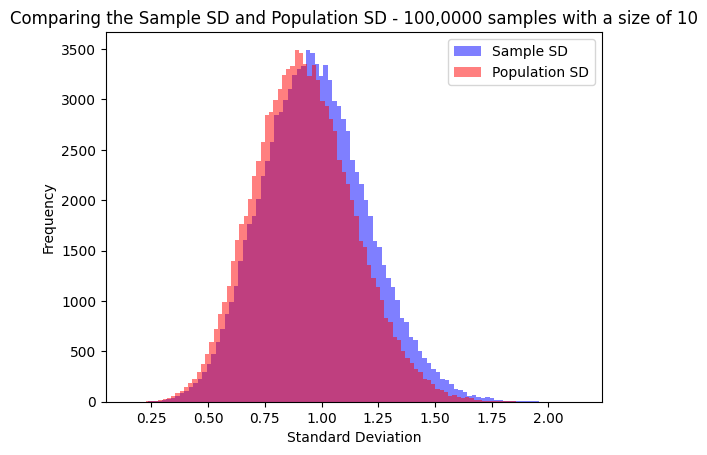

In [112]:
plt.hist(sample_sd, bins=100, alpha=0.5, label = "Sample SD", color = "blue") # set alpha to 0.5 to allow charts to overlap, applying a colour for clarity, bins set to 100 to allow for visability of non-overlapping data
plt.hist(population_sd, bins=100, alpha=0.5, label = "Population SD", color = "red") # same as above, different colour to ensure that the results are clear for both datasets
plt.xlabel ("Standard Deviation")
plt.ylabel("Frequency")
plt.title("Comparing the Sample SD and Population SD - 100,0000 samples with a size of 10")
plt.legend()


We can see that population_sd is shifted to the left of the historgram while sample_sd is shifted to the right and has a slightly broader set of results.

---
### 4. Explaining the difference between the two standard deviations
---

The difference between the two comes down to divisor for both cases. population_sd is being divided by N (ddof = 0) while sample_sd is being divided by N-1 (ddof = 1). Due to this every point in population_sd is being divided by a large number a larger denominator than sample_sd. As a result population_sd shifts to the left of the chart (where the standard deviation is on average smaller) while sample_sd shifts to the right (where it is larger). N-1 also introduces additionally variability compared to N, which tends to lead to a slightly larger variance and, by extension, a broader spread of results. population_sd assumes you have the data you have represents the whole population while sample_sd assumes you only have a sample of the overall population. The -1 is introduced in sample_sd is essentially a way of correcting for a small bias in the sample.

As to what happens to the gap when we increase the sample size, we would probably expect to see the gap reduce. N represents the sample size, in this instance 10. So in this instance N-1 would equal 9 If we were to increase our sample size to 100, N-1 would become 99. The relative gap between N and N-1 grows progressively smaller the larger N is (9 is 5% smaller than 10 while 99 is only 0.5% smaller than 99). Consequently, the greater N grows the less relative impact the -1 has on the difference between it and N. As a result, we would expect the population_sd and sample_sd to increasingly align in their results the larger N is, due to the increasingly smaller amount of variance between the two.

---
### 5. Testing our hypothesis for the larger sample size
---

In [113]:
# Same code for the variables, except for sample size
samples = 100000
samplesize = 100 # Smple size increased to 100 from 10
data = np.random.normal(0,1, (samples,samplesize)) 


In [114]:
# Same code for generating the standard deviation
sample_sd = np.std(data, ddof=1, axis=1) 
population_sd = np.std(data, ddof=0, axis=1)

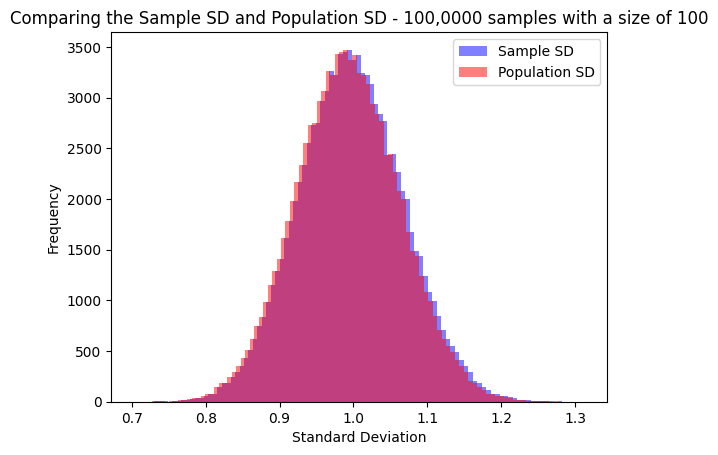

In [115]:
# All the same code for the histogram (except for the text related to the sample size)
plt.hist(sample_sd, bins=100, alpha=0.5, label = "Sample SD", color = "blue")
plt.hist(population_sd, bins=100, alpha=0.5, label = "Population SD", color = "red")
plt.xlabel ("Standard Deviation")
plt.ylabel("Frequency")
plt.title("Comparing the Sample SD and Population SD - 100,0000 samples with a size of 100")
plt.legend()

As we can see in the above example, when we increase the sample size, population_sd and sample_sd are much more aligned on the chart. Sample size consequently clearly has a significant impact on the variance between the two.

---
### **Problem 2 - Conclusion**
---


The two histograms occupy slightly different parts of the chart, with population_sd trending twoards the left side (where the standard deviation is smaller) and sample_sd trending towards the right  side (where the standard deviation is larger). This difference between the two is expected to decrease the larger N is.

## **Problem 3: t-Tests**
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/One_sample_t-test.png" alt="t-test" style="width: 600px; height: 400px;">

<small>By Cornell User 2 - Author's original own work (Original text: self-made, Mathematica, Inkscape), Public Domain, https://commons.wikimedia.org/w/index.php?curid=140537165<small>

___
### **Description of the problem**
___
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0 , 0.1 , 0.2 , … , 1.0 , repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

# END